In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, GridSearchCV

In [3]:
import pickle

In [4]:
import warnings
warnings.filterwarnings("ignore")

# Classification Types de Biens

On importe la version de jeux de données que nous avons qui n'a pas de valeurs manquantes dans la colonne "Type local". Elle nous permettra de classifier les biens n'ayant pas de type de local indiqué. 

In [5]:
df_model = pd.read_csv("df_sansNantypelocal.csv", sep="\t")

In [6]:
# On enlève les variables qui ne nous servirons pas à prédire le type de biens.
df_model = df_model.drop(columns=["Valeur fonciere", "year", "Unnamed: 0"])
df_model.head()


,Nombre de lots,Type local,Surface reelle bati,Nombre pieces principales,Surface terrain,exterieur,month,nom_departement,nom_region,pop_active,salaire_moyen,nb_etab_elem
0,0,Maison,150.0,3,347.0,1.0,1,Ain,Auvergne-Rhône-Alpes,320682.0,15.336249,405
1,0,Maison,180.0,6,680.0,1.0,6,Ain,Auvergne-Rhône-Alpes,320682.0,15.336249,405
2,0,Maison,147.0,6,1725.0,1.0,6,Ain,Auvergne-Rhône-Alpes,320682.0,15.336249,405
3,0,Local,1147.0,0,2693.0,1.0,6,Ain,Auvergne-Rhône-Alpes,320682.0,15.336249,405
4,0,Maison,97.0,4,1050.0,1.0,7,Ain,Auvergne-Rhône-Alpes,320682.0,15.336249,405


In [7]:
df_model.shape

(2270205, 12)

On ajoute ensuite nos variables supplémentaires en relation avec le prix au m² et le nombre de ventes aggrégées par département.

In [8]:
m2 = pd.read_csv("m2.csv")
m2.head()

,nom_departement,mean_prixm2,q1_prixm2,q3_prixm2
0,Ain,2235.777587,1662.166667,2653.858156
1,Aisne,1289.592416,986.500000,1540.666667
2,Allier,1125.098839,886.875000,1298.196429
3,Alpes-Maritimes,3366.643302,2009.954545,4508.419449
4,Alpes-de-Haute-Provence,2106.623975,1713.250000,2410.000000


In [9]:
n_mutation = pd.read_csv("nbre_ventes.csv")
n_mutation.head()

,nom_departement,Total_Mutations
0,Ain,12389
1,Aisne,8306
2,Allier,5781
3,Alpes-Maritimes,89481
4,Alpes-de-Haute-Provence,3949


In [10]:
df_model = pd.merge(df_model, m2,how="inner", on="nom_departement")
df_model.head()

,Nombre de lots,Type local,Surface reelle bati,Nombre pieces principales,Surface terrain,exterieur,month,nom_departement,nom_region,pop_active,salaire_moyen,nb_etab_elem,mean_prixm2,q1_prixm2,q3_prixm2
0,0,Maison,150.0,3,347.0,1.0,1,Ain,Auvergne-Rhône-Alpes,320682.0,15.336249,405,2235.777587,1662.166667,2653.858156
1,0,Maison,180.0,6,680.0,1.0,6,Ain,Auvergne-Rhône-Alpes,320682.0,15.336249,405,2235.777587,1662.166667,2653.858156
2,0,Maison,147.0,6,1725.0,1.0,6,Ain,Auvergne-Rhône-Alpes,320682.0,15.336249,405,2235.777587,1662.166667,2653.858156
3,0,Local,1147.0,0,2693.0,1.0,6,Ain,Auvergne-Rhône-Alpes,320682.0,15.336249,405,2235.777587,1662.166667,2653.858156
4,0,Maison,97.0,4,1050.0,1.0,7,Ain,Auvergne-Rhône-Alpes,320682.0,15.336249,405,2235.777587,1662.166667,2653.858156


In [11]:
df_model = pd.merge(df_model, n_mutation,how="inner", on="nom_departement")
df_model.head()

,Nombre de lots,Type local,Surface reelle bati,Nombre pieces principales,Surface terrain,exterieur,month,nom_departement,nom_region,pop_active,salaire_moyen,nb_etab_elem,mean_prixm2,q1_prixm2,q3_prixm2,Total_Mutations
0,0,Maison,150.0,3,347.0,1.0,1,Ain,Auvergne-Rhône-Alpes,320682.0,15.336249,405,2235.777587,1662.166667,2653.858156,12389
1,0,Maison,180.0,6,680.0,1.0,6,Ain,Auvergne-Rhône-Alpes,320682.0,15.336249,405,2235.777587,1662.166667,2653.858156,12389
2,0,Maison,147.0,6,1725.0,1.0,6,Ain,Auvergne-Rhône-Alpes,320682.0,15.336249,405,2235.777587,1662.166667,2653.858156,12389
3,0,Local,1147.0,0,2693.0,1.0,6,Ain,Auvergne-Rhône-Alpes,320682.0,15.336249,405,2235.777587,1662.166667,2653.858156,12389
4,0,Maison,97.0,4,1050.0,1.0,7,Ain,Auvergne-Rhône-Alpes,320682.0,15.336249,405,2235.777587,1662.166667,2653.858156,12389


In [12]:
df_model.shape

(2142628, 16)

Nous pouvons ensuite diviser notre jeu de données tout d'abord en séparant entre les variables exogènes et la variable endogène (Type local), puis ensuite en un échantillon d'apprentissage et un échantillon test. 

In [13]:
X = df_model.drop(columns=["Type local", "nom_departement", "nom_region"])
X.head()

,Nombre de lots,Surface reelle bati,Nombre pieces principales,Surface terrain,exterieur,month,pop_active,salaire_moyen,nb_etab_elem,mean_prixm2,q1_prixm2,q3_prixm2,Total_Mutations
0,0,150.0,3,347.0,1.0,1,320682.0,15.336249,405,2235.777587,1662.166667,2653.858156,12389
1,0,180.0,6,680.0,1.0,6,320682.0,15.336249,405,2235.777587,1662.166667,2653.858156,12389
2,0,147.0,6,1725.0,1.0,6,320682.0,15.336249,405,2235.777587,1662.166667,2653.858156,12389
3,0,1147.0,0,2693.0,1.0,6,320682.0,15.336249,405,2235.777587,1662.166667,2653.858156,12389
4,0,97.0,4,1050.0,1.0,7,320682.0,15.336249,405,2235.777587,1662.166667,2653.858156,12389


In [14]:
y = df_model.iloc[:,1]
y.head()

0    Maison
1    Maison
2    Maison
3     Local
4    Maison
Name: Type local, dtype: object

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.33, stratify=y, random_state=42)

In [16]:
X_train.head()

,Nombre de lots,Surface reelle bati,Nombre pieces principales,Surface terrain,exterieur,month,pop_active,salaire_moyen,nb_etab_elem,mean_prixm2,q1_prixm2,q3_prixm2,Total_Mutations
625441,2,68.0,4,0.0,0.0,10,785650.0,16.008478,664,2302.792366,1614.083333,2742.625000,55058
499439,0,110.0,5,350.0,1.0,12,405879.0,14.324161,534,1812.268260,1422.877273,2157.753655,18104
1814716,0,115.0,4,1448.0,1.0,3,247482.0,14.528516,262,3121.845347,2448.610500,3526.818000,11342
1924509,0,89.0,4,370.0,1.0,8,636748.0,17.849039,470,3262.875189,2807.924750,3656.625250,19873
987747,0,120.0,5,90.0,1.0,1,73676.0,13.643049,155,1629.859706,1361.583500,1791.500000,3415


## Decision Tree Classifier

Pour réaliser cette classification, nous nous baserons sur un algorithme de classification de type arbre de décision. Pour trouver les meilleurs paramètres, nous utiliserons la fonction GridSearchCV qui va venir comparer les différentes combinaisons d'hyperparamètres.

In [17]:
# On instantie l'arbre de classification
tree = DecisionTreeClassifier()

In [18]:
tree

DecisionTreeClassifier()

In [19]:
# Dictionnaire avec les hyperparamètres à tester
parameters = {'min_samples_split': [100,500,1000,5000,10000], 
               'min_samples_leaf':[50,250,500,2500,5000],
               'random_state':[42]
               }

In [20]:
# On instantie notre objet de gridsearch
clf = GridSearchCV(tree, parameters)

In [21]:
# On l'apprend sur notre échantillon d'apprentissage.
clf.fit(X_train, y_train) 

GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'min_samples_leaf': [50, 250, 500, 2500, 5000],
                         'min_samples_split': [100, 500, 1000, 5000, 10000],
                         'random_state': [42]})

In [22]:
print(clf.best_params_) 

{'min_samples_leaf': 50, 'min_samples_split': 100, 'random_state': 42}


Cela nous permet ensuite de pouvoir récupérer l'importance de chaque variable dans l'arbre de classification. 

In [23]:

importance = clf.best_estimator_.feature_importances_
importance

array([4.85300287e-01, 1.28846458e-01, 3.71154340e-01, 6.98033655e-03,
       1.23586628e-05, 7.55017568e-04, 9.50514683e-04, 2.13126944e-03,
       7.53307488e-04, 8.93194448e-04, 8.67076155e-04, 4.64749740e-04,
       8.91090674e-04])

In [24]:
for feat, importance in zip(X_train.columns, clf.best_estimator_.feature_importances_):
    print('feature: {f}, importance: {i}'.format(f=feat, i=importance))

feature: Nombre de lots, importance: 0.4853002865981976
feature: Surface reelle bati, importance: 0.1288464583274982
feature: Nombre pieces principales, importance: 0.37115433966261663
feature: Surface terrain, importance: 0.006980336547561454
feature: exterieur, importance: 1.2358662844754847e-05
feature: month, importance: 0.0007550175680197313
feature: pop_active, importance: 0.0009505146825050148
feature: salaire_moyen, importance: 0.002131269444943296
feature: nb_etab_elem, importance: 0.0007533074883603952
feature: mean_prixm2, importance: 0.0008931944477500792
feature: q1_prixm2, importance: 0.0008670761550415277
feature: q3_prixm2, importance: 0.0004647497403812607
feature: Total_Mutations, importance: 0.0008910906742800864


In [31]:
feat_import = pd.DataFrame({"importance": clf.best_estimator_.feature_importances_, "variables": X_train.columns}).sort_values(by="importance", ascending=False)
feat_import

,importance,variables
0,0.485300,Nombre de lots
2,0.371154,Nombre pieces principales
1,0.128846,Surface reelle bati
3,0.006980,Surface terrain
7,0.002131,salaire_moyen
6,0.000951,pop_active
9,0.000893,mean_prixm2
12,0.000891,Total_Mutations
10,0.000867,q1_prixm2
5,0.000755,month


<Axes: xlabel='importance', ylabel='variables'>

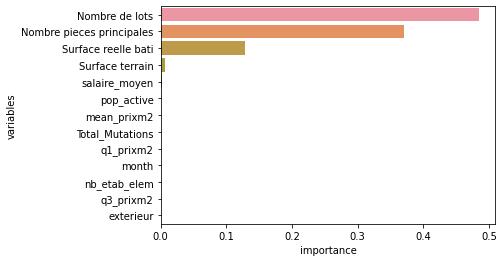

In [32]:
sns.barplot(data=feat_import,  x="importance",y="variables")

Nous pouvons en conclure que manifestement c'est le nombre de lots, la surface réelle du batiment et le nombre de pièces principales qui sont déterminants pour pouvoir classifier les différents types de biens. Le reste des variables est d'importance minime (moins de 1%).

In [27]:

grid_predictions = clf.predict(X_test) 

In [28]:
from sklearn.metrics import classification_report, confusion_matrix

In [29]:
print(classification_report(y_test, grid_predictions)) 

              precision    recall  f1-score   support

 Appartement       0.94      0.97      0.95    178160
  Dépendance       0.99      1.00      0.99     96224
       Local       0.98      0.96      0.97     40351
      Maison       0.99      0.97      0.98    392333

    accuracy                           0.97    707068
   macro avg       0.97      0.98      0.97    707068
weighted avg       0.97      0.97      0.97    707068



Nous pouvons observer que sur notre échantillon test, notre algorithme de classification a de très bonnes mesures de performance. Il devrait donc réussir à classifier les biens n'ayant pas de types de locaux attribués de manière précise. 

Nous pouvons donc ensuite extraire notre modèle pour l'utiliser plus tart dans les pipelines de préprocessing.

In [30]:
model_pkl_file = "tree_classif_typelocal3.pkl"  

with open(model_pkl_file, 'wb') as file:  
    pickle.dump(clf.best_estimator_, file)